In [1]:
import pandas as pd
import sys
import os
scripts_path = "../scripts"
sys.path.append(scripts_path)


In [2]:

import importlib
import time_analysisss
importlib.reload(time_analysisss)

from time_analysisss import load_data

df = load_data("../data/raw/EW- time table for downward.csv")



In [3]:
import sys
sys.path.append('../scripts')  # adjust if needed

import importlib
import passenger_flow_utils
importlib.reload(passenger_flow_utils)

from passenger_flow_utils import basic_checks


In [4]:
basic_checks(df)

--- Shape ---
(45, 66)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Stations        45 non-null     object
 1   Stations-code   45 non-null     object
 2   Train times     45 non-null     object
 3   10103           45 non-null     object
 4   10203           45 non-null     object
 5   10303           45 non-null     object
 6   10403           45 non-null     object
 7   10503           45 non-null     object
 8   10603           45 non-null     object
 9   10703           45 non-null     object
 10  10803           45 non-null     object
 11  10105           45 non-null     object
 12  10205           45 non-null     object
 13  10305           45 non-null     object
 14  10405           45 non-null     object
 15  10505           45 non-null     object
 16  10605           45 non-null     object
 17  10705           45 

In [5]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import drop_high_nan_columns

df = drop_high_nan_columns(df, threshold=0.25)


Dropping columns with > 25.0% NaNs: []


In [6]:
df.columns

Index(['Stations ', 'Stations-code ', 'Train times', '10103', '10203', '10303',
       '10403', '10503', '10603', '10703', '10803', '10105', '10205', '10305',
       '10405', '10505', '10605', '10705', '10805', '10107', '10207', '10307',
       '10407', '10507', '10607', '10707', '10807', '10109', '10209', '10309',
       '10409', '10509', '10609', '10709', '10809', '10111', '10211', '10311',
       '10411', '10511', '10611', '10711', '10811', '10113', '10213', '10313',
       '10413', '10513', '10613', '10713', '10813', '10115', '10215', '10315',
       '10415', '10515', '10615', '10715', '10815', '10117', '10217', '10317',
       '10517', '10617', '10717', '10119'],
      dtype='object')

In [7]:
# raname columns for better readability
df = df.rename(columns={'Stations-code ': 'station_id'})
df = df.rename(columns={'Train times': 'arrival_departure'})
df = df.rename(columns={'Stations ': 'Stations'})



In [8]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import melt_and_pivot_train_schedule

df_pivot = melt_and_pivot_train_schedule(df)


c:\Users\nebiy\OneDrive\Documents\code\Train-Passenger-Flow-Analysis\notebooks\../scripts\time_analysisss.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pivot['Arrival'] = pd.to_datetime(df_pivot['Arrival'], errors='coerce')
c:\Users\nebiy\OneDrive\Documents\code\Train-Passenger-Flow-Analysis\notebooks\../scripts\time_analysisss.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pivot['Departure'] = pd.to_datetime(df_pivot['Departure'], errors='coerce')


In [9]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import fill_missing_times_with_station_avg

df_pivot = fill_missing_times_with_station_avg(df_pivot)


In [10]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import calculate_dwell_time
df_pivot = calculate_dwell_time(df_pivot)


In [11]:
basic_checks(df_pivot)

--- Shape ---
(2835, 6)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Stations    2835 non-null   object         
 1   station_id  2835 non-null   object         
 2   train_id    2835 non-null   object         
 3   Arrival     2835 non-null   datetime64[ns] 
 4   Departure   2835 non-null   datetime64[ns] 
 5   Dwell Time  2835 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), object(3), timedelta64[ns](1)
memory usage: 133.0+ KB

--- Null Values ---
arrival_departure
Stations      0
station_id    0
train_id      0
Arrival       0
Departure     0
Dwell Time    0
dtype: int64

--- Descriptive Statistics ---
arrival_departure                        Arrival  \
count                                       2835   
mean               2025-07-29 12:09:21.597379584   
min                          2025-07-29 06:00:0

In [12]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import check_null
check_null(df_pivot)

arrival_departure
Stations      0.0
station_id    0.0
train_id      0.0
Arrival       0.0
Departure     0.0
Dwell Time    0.0
dtype: float64


In [13]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import compute_station_gap_stats

station_stats = compute_station_gap_stats(df_pivot)

Computed station gap stats:
   Stations   Avg_Gap  Min_Gap  Max_Gap   Gap_Std
39    ST-45  7.093831      0.0     15.0  7.496685
18    ST-26  7.504608      0.0     15.0  7.556665
38    ST-44  7.504608      0.0     15.0  7.556665
16    ST-24  7.505952      0.0     15.0  7.555368
36    ST-42  7.505952      0.0     15.0  7.555368


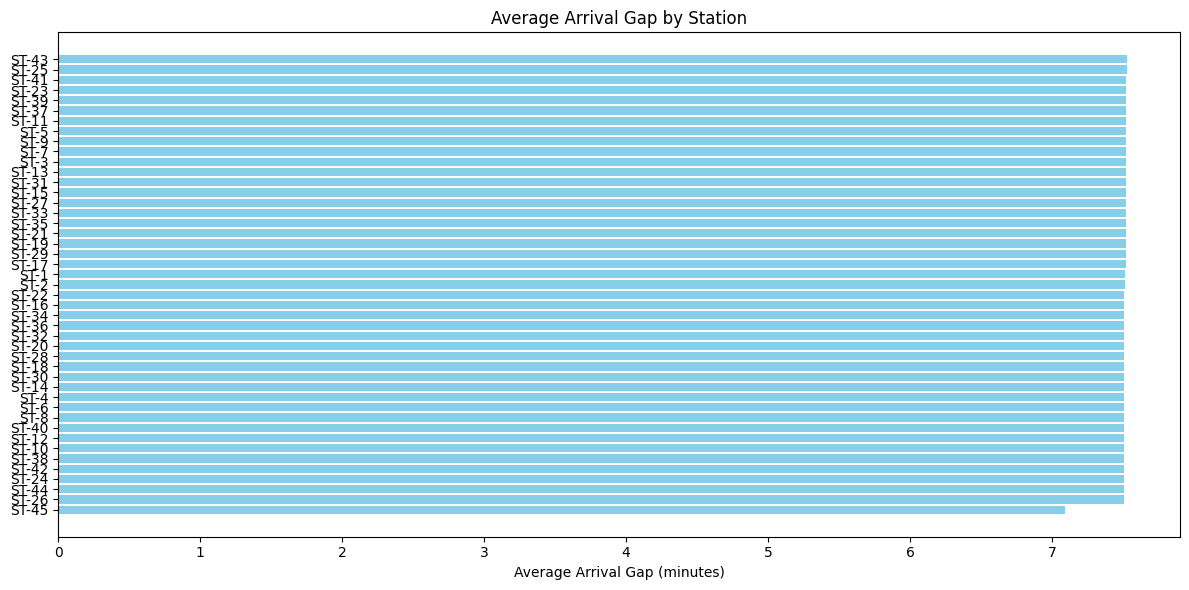

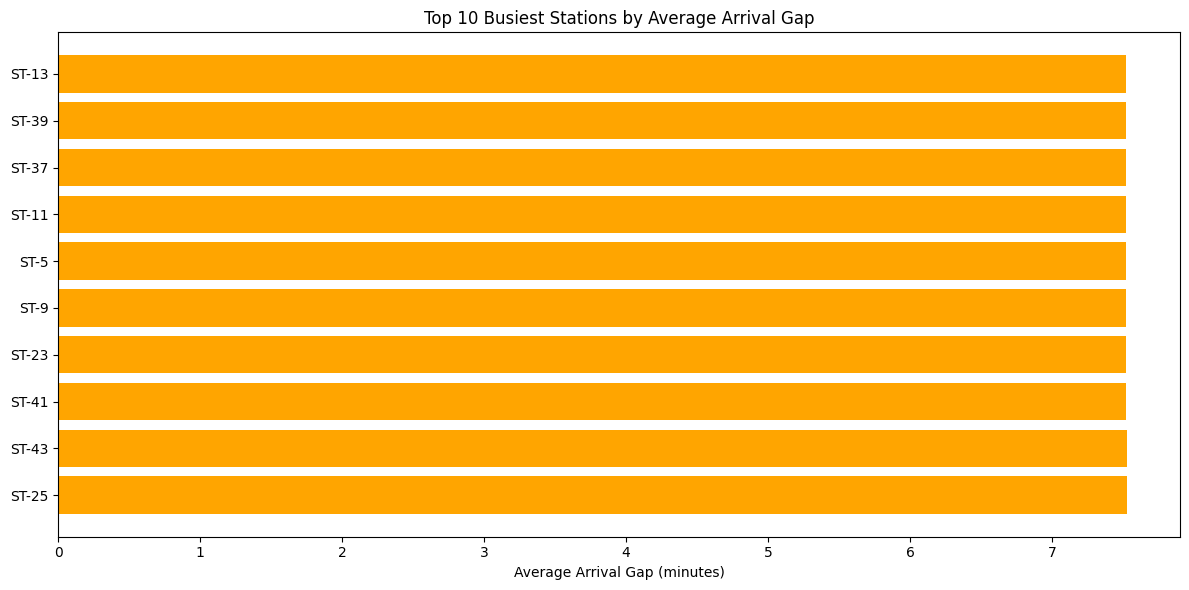

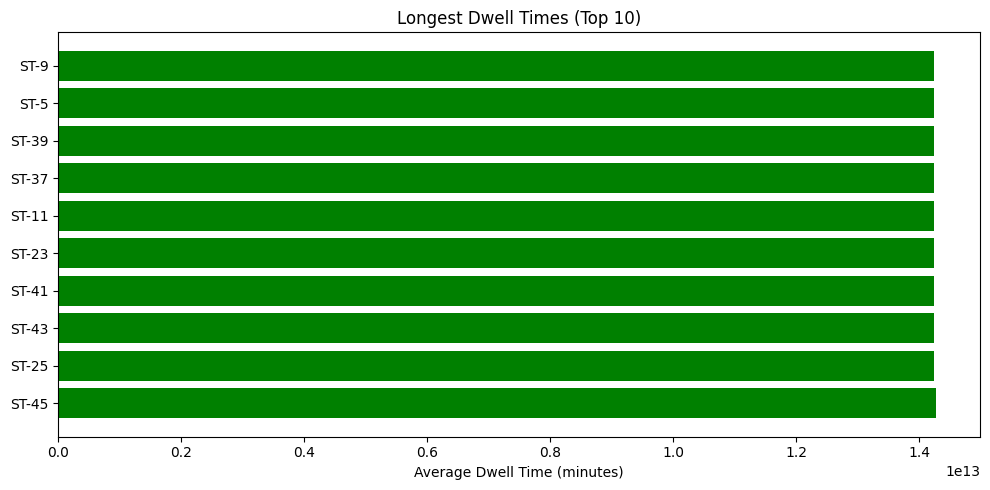

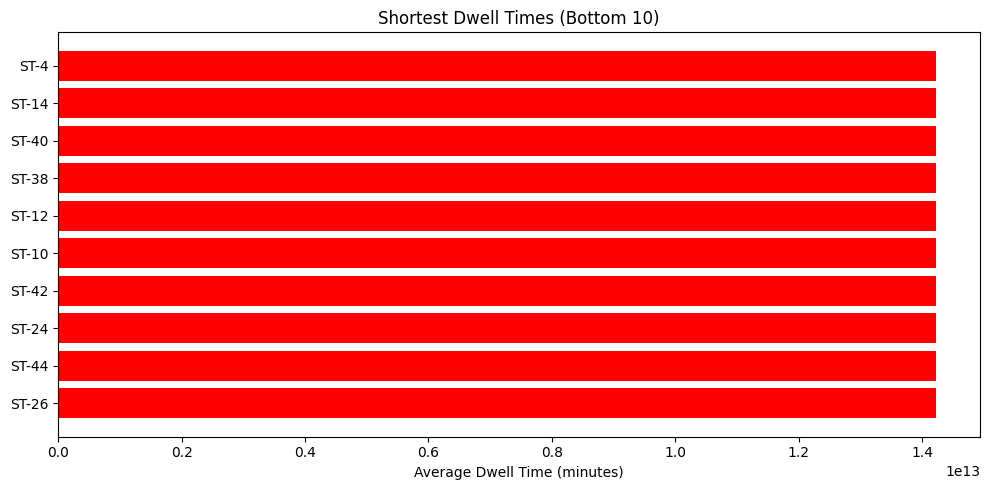

In [14]:
import importlib
import plot_utils  # This must succeed; make sure plot_utils.py is in the same directory or in PYTHONPATH

importlib.reload(plot_utils)

plot_utils.plot_avg_arrival_gap(station_stats)
plot_utils.plot_top_avg_gaps(station_stats)
plot_utils.plot_dwell_time_extremes(df_pivot)


In [15]:
df_pivot.columns

Index(['Stations', 'station_id', 'train_id', 'Arrival', 'Departure',
       'Dwell Time'],
      dtype='object', name='arrival_departure')

In [16]:
df_pivot["Dwell Time"]

0      0 days 07:45:57.142857216
1      0 days 05:45:57.142857216
2      0 days 03:45:57.142857216
3      0 days 01:45:57.142857216
4      0 days 00:14:02.857142784
                  ...           
2830   0 days 02:01:27.142857216
2831   0 days 00:01:27.142857216
2832   0 days 01:58:32.857142784
2833   0 days 03:58:32.857142784
2834   0 days 05:58:32.857142784
Name: Dwell Time, Length: 2835, dtype: timedelta64[ns]

In [17]:
# PRINT HOW MUCH OF THE DATA IS MISSING
missing_data = df_pivot.isnull().mean() * 100
print(missing_data[missing_data > 0])  # only print columns with missing data

Series([], dtype: float64)


In [18]:
#save df_privot as csv
df_pivot.to_csv('../data/processed/EW_time_table_processed_downward.csv', index=False)